<a href="https://colab.research.google.com/github/akankshakusf/ML_Quality-of-Life-Indices-by-Country/blob/master/ml_quality_of_life_indices_by_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import kagglehub

# Download latest version
path = kagglehub.dataset_download("marcelobatalhah/quality-of-life-index-by-country")

print("Path to dataset files:", path)

100%|██████████| 32.5k/32.5k [00:00<00:00, 34.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marcelobatalhah/quality-of-life-index-by-country/versions/2


# Dataset Overview: Quality of Life Indices by Country

## General Description
This dataset provides information on Quality of Life Indices across different countries for multiple years. It includes various factors such as purchasing power, safety, healthcare, cost of living, property affordability, traffic commute times, pollution, and climate conditions. The dataset can be used for comparative analysis of living conditions across countries, trend analysis, and machine learning applications related to socio-economic factors.

## Dataset Summary
* Number of Entries: 1,495
* Number of Features: 12
* Data Types:
    * Numeric Features: 8 (Float values)
    * Categorical Features: 3 (Country, Climate Index, Year)
    * Rank Feature: 1 (Integer)

## Features Overview
* Rank (Integer) – The ranking of the country based on the Quality of Life Index.
* Country (String) – The name of the country.
* Quality of Life Index (Float) – A composite score representing overall quality of life in a country.
* Purchasing Power Index (Float) – Measures relative purchasing power in the country.
* Safety Index (Float) – Indicates the level of safety in the country.
* Health Care Index (Float) – Represents the quality and accessibility of healthcare.
* Cost of Living Index (Float) – Reflects the average cost of living in the country.
* Property Price to Income Ratio (Float) – The affordability of property compared to income levels.
* Traffic Commute Time Index (Float) – Measures average commuting time and congestion.
* Pollution Index (Float) – Shows the level of environmental pollution.
* Climate Index (String) – Indicates climate conditions (data format unclear in the dataset).
* Year (String) – The year when data was recorded.


# Data Exploration

## Data Downloading- Importing Kaggle Dataset

In [19]:
##import packages
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [20]:
df = pd.read_csv(os.path.join(path, "quality_of_life_indices_by_country.csv"))

In [21]:
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


In [22]:
df.shape

(1495, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

## Check for missing values

In [24]:
df.isnull().sum()

,0
Rank,0
Country,0
Quality of Life Index,0
Purchasing Power Index,0
Safety Index,0
Health Care Index,0
Cost of Living Index,0
Property Price to Income Ratio,0
Traffic Commute Time Index,0
Pollution Index,0


## Check for duplicate rows

In [25]:
df.duplicated().sum()

np.int64(0)

## Drop missing values if necessary

In [26]:
df = df.dropna()

## Remove duplicate rows if necessary

In [27]:
df = df.drop_duplicates()

In [28]:
df.shape

(1495, 12)

In [31]:
df.columns

Index(['Rank', 'Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Year'],
      dtype='object')

# Data Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Histogram of Quality of Life Index

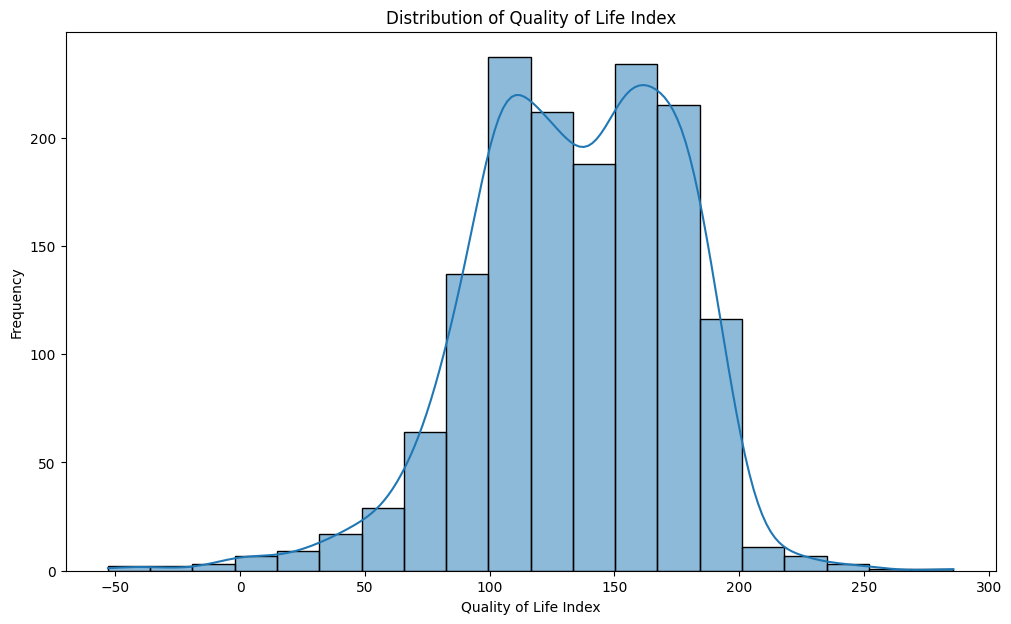

In [30]:
plt.figure(figsize=(12,7))
sns.histplot(df['Quality of Life Index'], bins=20, kde=True)
plt.xlabel('Quality of Life Index')
plt.ylabel('Frequency')
plt.title('Distribution of Quality of Life Index')
plt.show()

The distribution of Quality_of_Life_Index is approximately normal, centered around 120–160, indicating that most countries have moderate living standards, with few extreme highs or lows.

## 2. Boxplot of Cost of Living Index

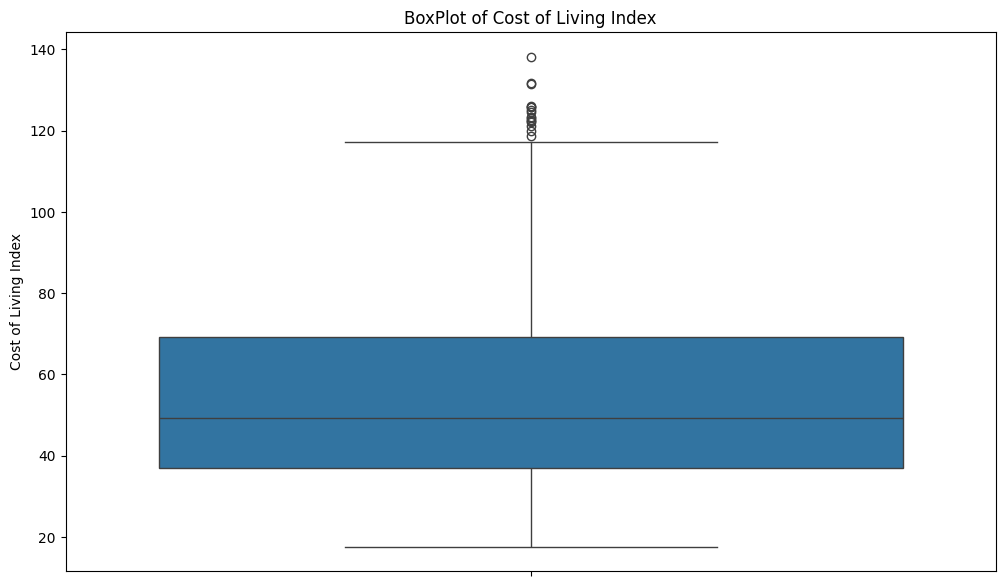

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(y=df['Cost of Living Index'])
plt.ylabel('Cost of Living Index')
plt.title('BoxPlot of Cost of Living Index')
plt.show()

The median Cost_of_Living_Index is around 50, with most countries falling between roughly 35 (Q1) and 70 (Q3). A few countries show exceptionally high cost values (above 120), marking them as outliers where living expenses are significantly higher than the global average.

## 3. Scatter plot: Purchasing Power Index vs Quality of Life Index

In [50]:
# median_qol = df['Quality of Life Index'].median()
# median_qol

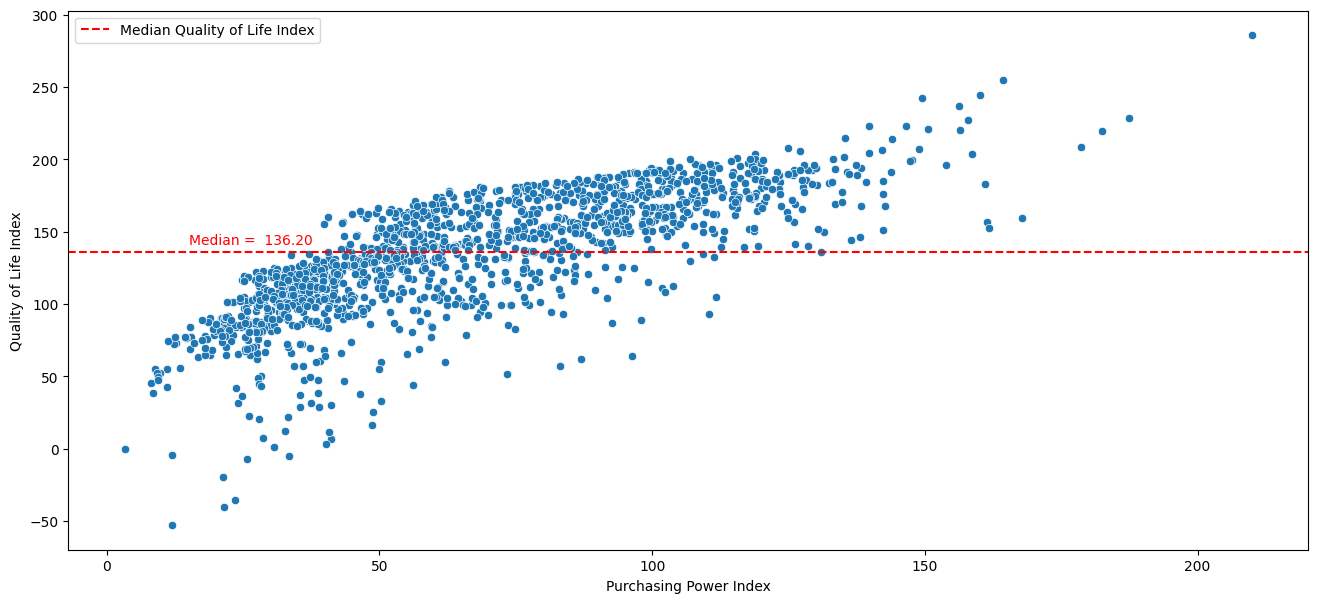

In [54]:
plt.figure(figsize=(16,7))
sns.scatterplot(x=df['Purchasing Power Index'], y=df['Quality of Life Index'])
median_qol = df['Quality of Life Index'].median()
plt.xlabel('Purchasing Power Index')
plt.ylabel('Quality of Life Index')
plt.axhline(median_qol, color='red', linestyle='--', label= "Median Quality of Life Index" )
plt.text(15, median_qol+5, f'Median = {median_qol: .2f} ',color='red',fontsize=10)
plt.legend()
plt.show()

The scatter plot of Purchasing_Power_Index vs Quality_of_Life_Index shows a strong positive correlation — as purchasing power increases, quality of life generally rises. The red dashed line and label indicate the global median Quality_of_Life_Index (≈136.20), showing that most countries with Purchasing_Power_Index above ~70 lie above this median threshold.

## 4. Bar plot: Top 10 countries by Quality of Life Index

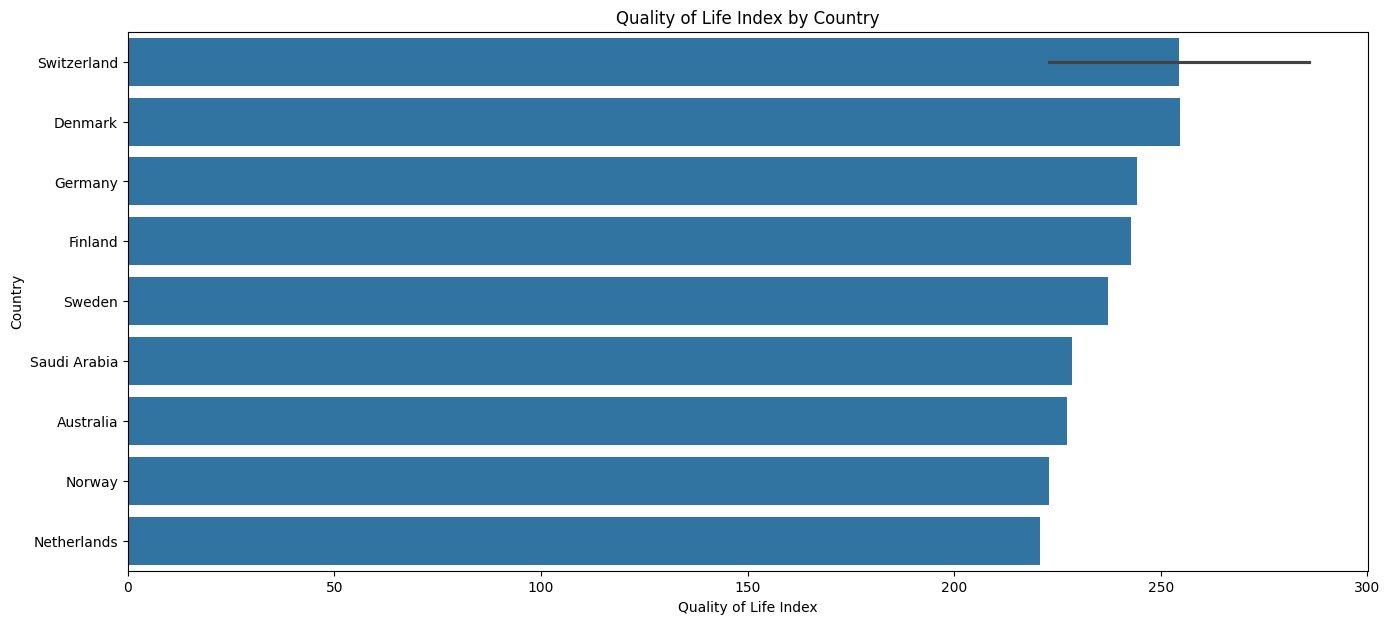

In [57]:
top_10 = df.nlargest(10, "Quality of Life Index")
plt.figure(figsize=(16,7))
sns.barplot(x=df['Quality of Life Index'],y=top_10['Country'])
plt.xlabel('Quality of Life Index')
plt.ylabel('Country')
plt.title('Quality of Life Index by Country')
plt.show()

The bar chart shows that Switzerland, Denmark, and Germany rank highest in the Quality_of_Life_Index, with scores approaching 250–270. Northern European countries like Finland, Sweden, and Norway also feature prominently, indicating that the region maintains consistently high living standards.

## 5. Heatmap of Correlation Matrix

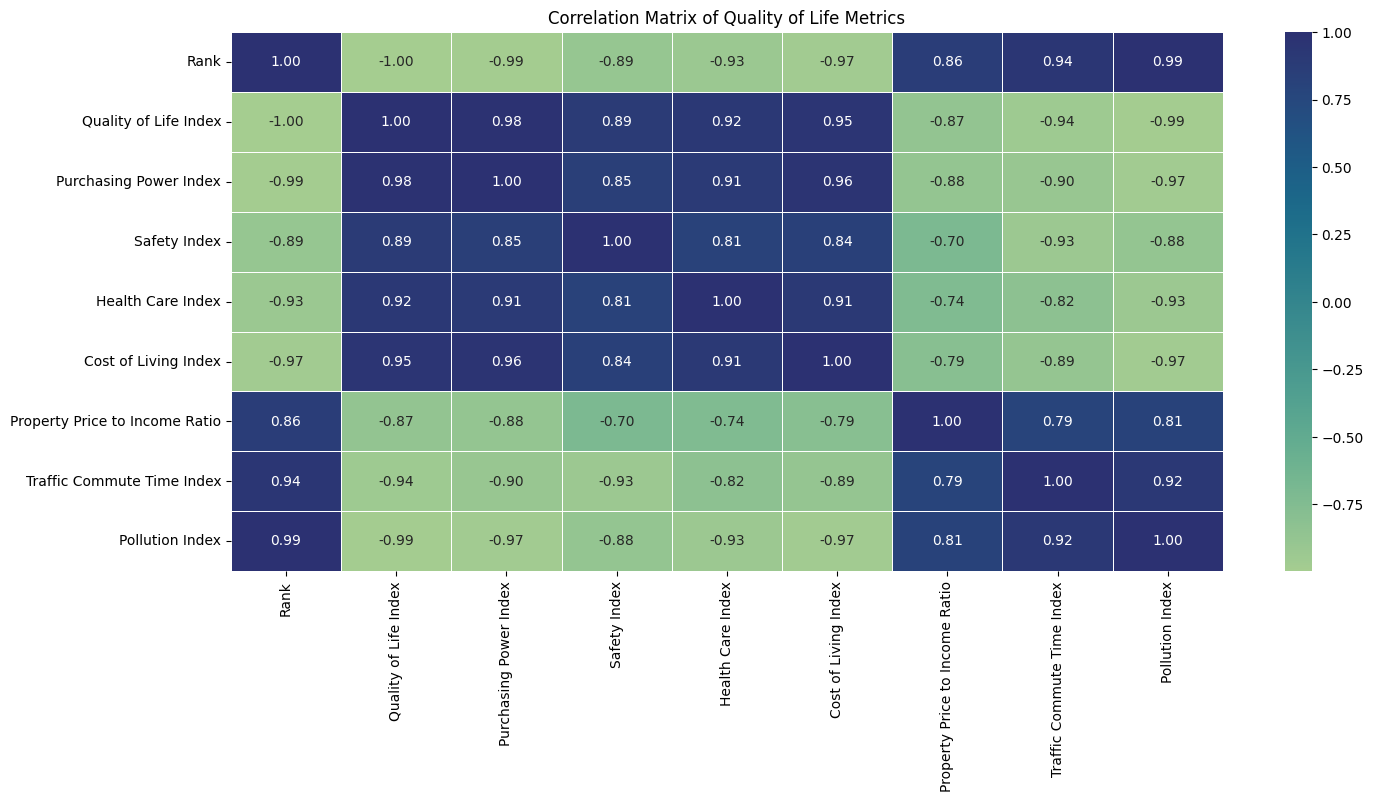

In [61]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(numeric_only=True) , annot=True, cmap='crest',fmt =".2f", linewidths=0.5)
plt.title('Correlation Matrix of Quality of Life Metrics')
plt.show()

The correlation matrix shows that Quality_of_Life_Index is strongly and positively correlated with Purchasing_Power_Index (0.98), Cost_of_Living_Index (0.95), Health_Care_Index (0.92), and Safety_Index (0.89), indicating that higher income, safety, and healthcare standards are key contributors to overall quality of life. Conversely, it is negatively correlated with Pollution_Index (−0.99) and Traffic_Commute_Time_Index (−0.94), suggesting that increased pollution and long commutes significantly lower living quality.

## 6. Line plot: Quality of Life Index for top 10 countries

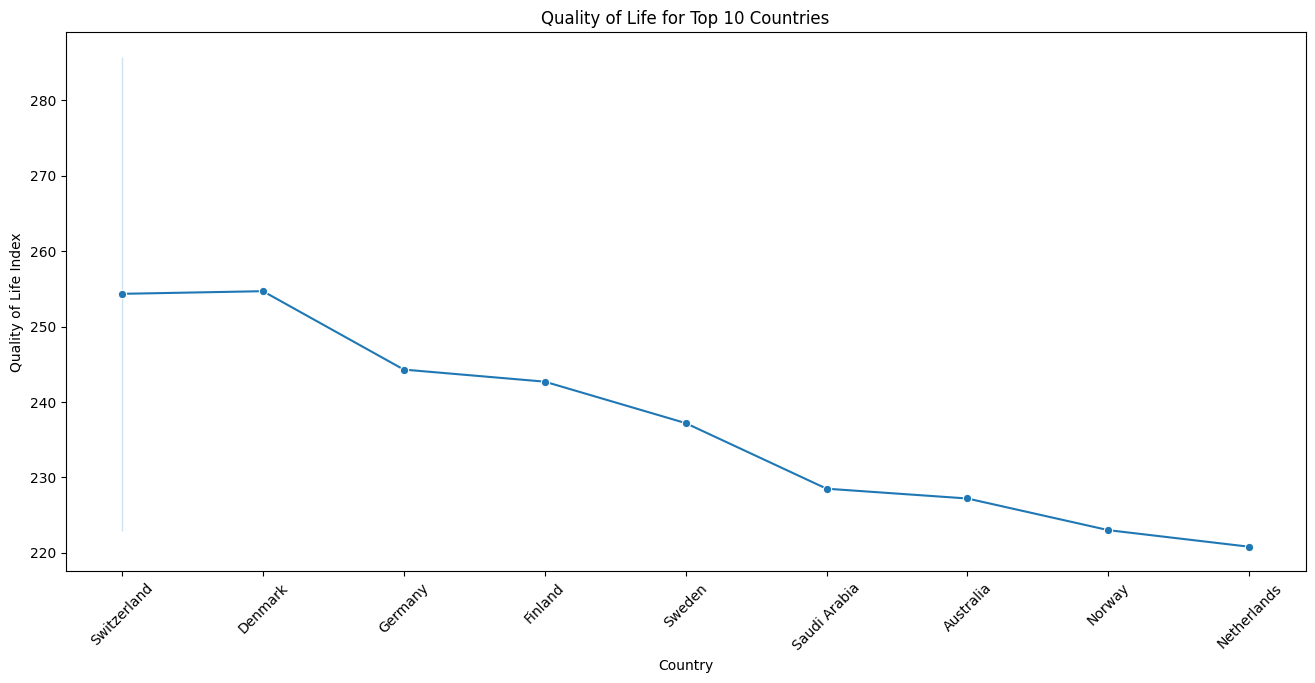

In [62]:
plt.figure(figsize=(16,7))
sns.lineplot(x=top_10['Country'], y=top_10['Quality of Life Index'], marker='o')
plt.xlabel('Country')
plt.ylabel('Quality of Life Index')
plt.title('Quality of Life for Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

The line plot shows that Switzerland and Denmark have the highest Quality_of_Life_Index values (around 255), followed by Germany, Finland, and Sweden with slightly lower scores. After Sweden, there is a noticeable downward trend — countries like Saudi Arabia, Australia, Norway, and Netherlands still score high but show a gradual decline, marking the tail end of the top 10

## 7. Violin plot of Health Care Index


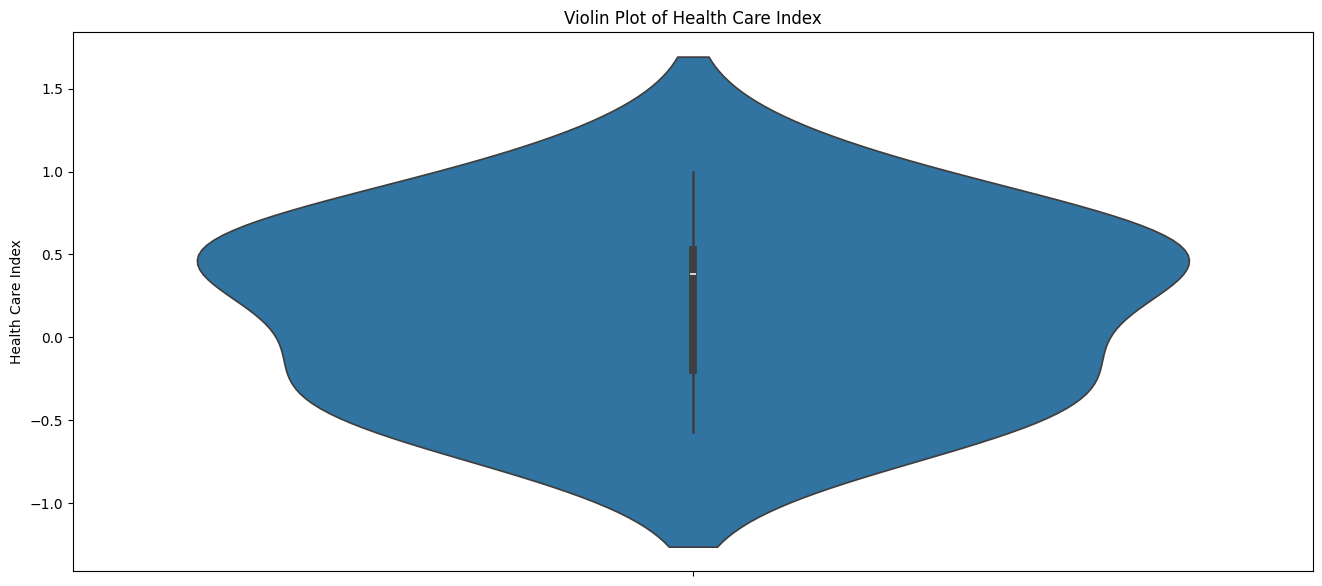

In [63]:
plt.figure(figsize=(16,7))
sns.violinplot(y=df['Health Care Index'])
plt.ylabel('Health Care Index')
plt.title('Violin Plot of Health Care Index')
plt.show()

The Health_Care_Index distribution is roughly symmetric, with most countries concentrated around the middle range (median slightly above 0). The moderate width in the center indicates that many countries have comparable healthcare quality, while the tapering ends show fewer countries with extremely low or extremely high healthcare performance.

## 8. Distribution plot of Pollution Index

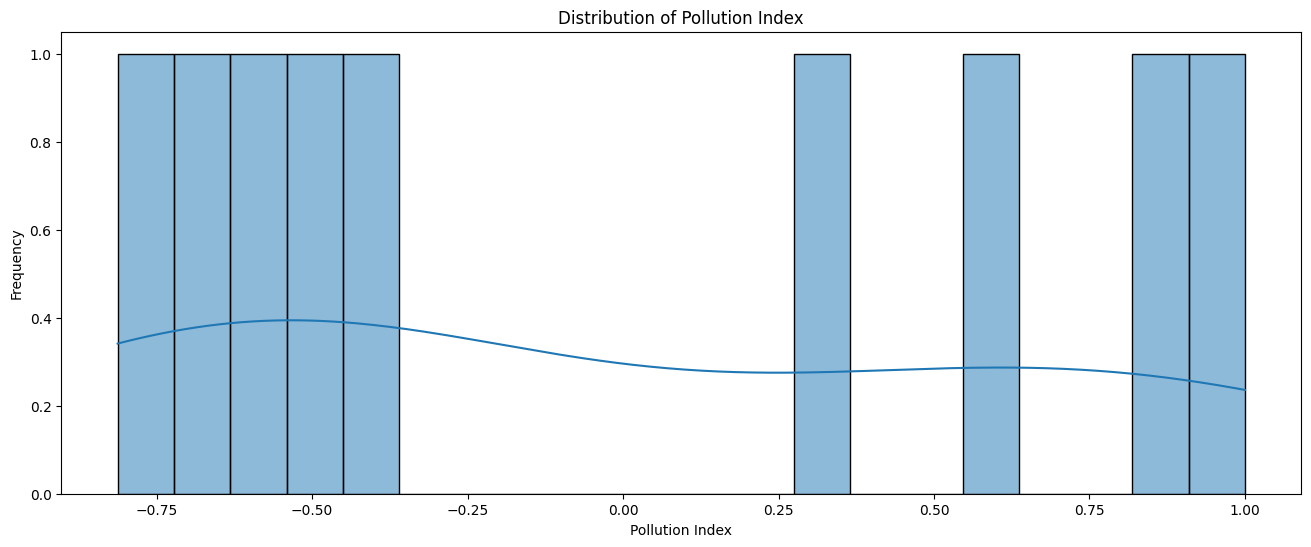

In [65]:
plt.figure(figsize=(16,6))
sns.histplot(df['Pollution Index'], bins=20, kde=True)
plt.xlabel("Pollution Index")
plt.ylabel("Frequency")
plt.title("Distribution of Pollution Index")
plt.show()

## 9. Countplot of Property Price to Income Ratio

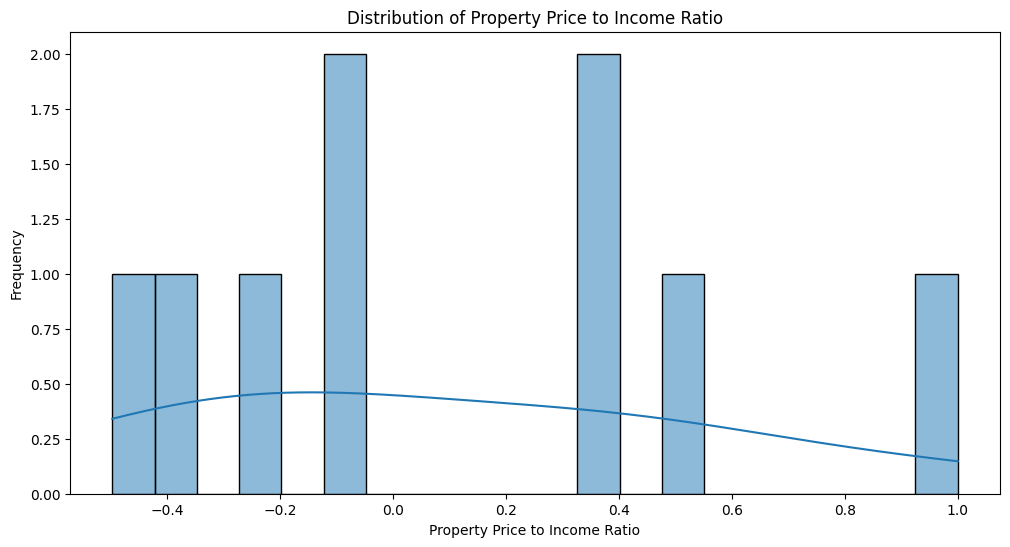

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(df['Property Price to Income Ratio'], bins=20, kde=True)
plt.title('Distribution of Property Price to Income Ratio')
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Frequency')
plt.show()

## 10. Swarm plot of Safety Index

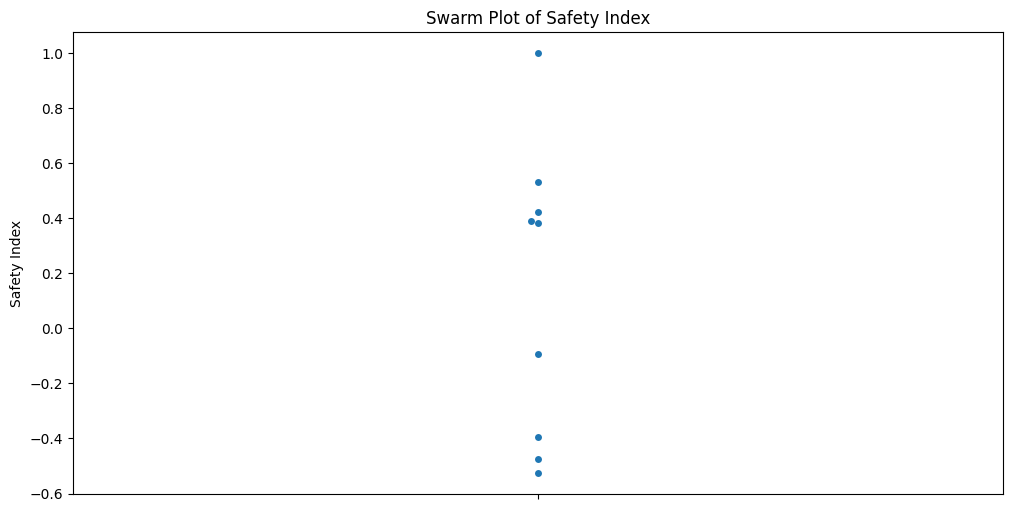

In [68]:
plt.figure(figsize=(12,6))
sns.swarmplot(y=df['Safety Index'])
plt.title('Swarm Plot of Safety Index')
plt.ylabel('Safety Index')
plt.show()

## 11. Relationship plot: Traffic Commute Time Index vs Quality of Life Index

In [69]:
df.columns

Index(['Rank', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index'],
      dtype='object')

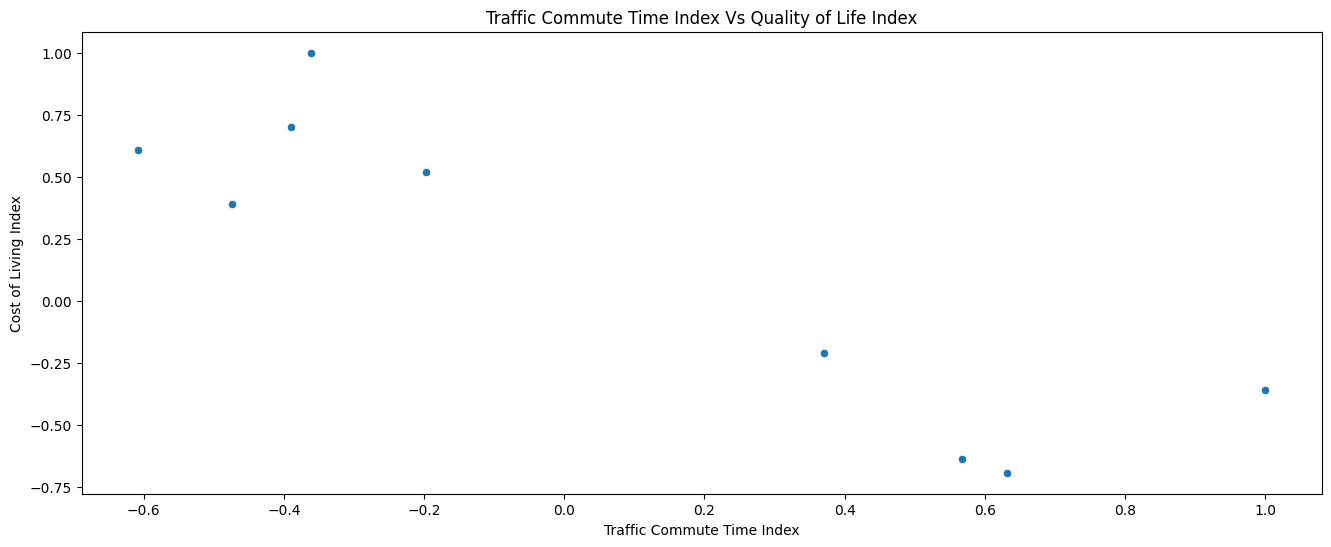

In [70]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df['Traffic Commute Time Index'], y=df['Cost of Living Index'])
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Cost of Living Index')
plt.title('Traffic Commute Time Index Vs Quality of Life Index')
plt.show()

## 12. Strip plot of Purchasing Power Index

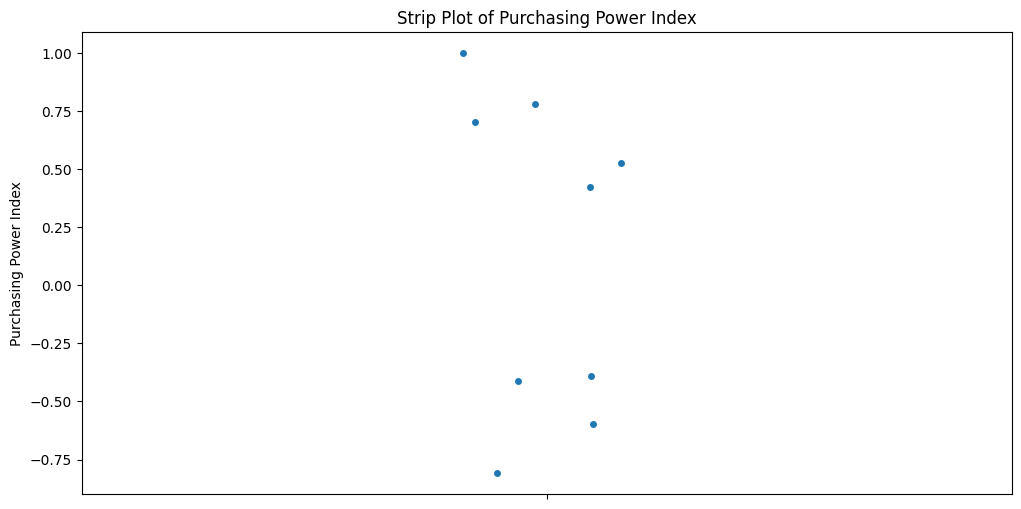

In [71]:
plt.figure(figsize=(12,6))
sns.stripplot(y=df['Purchasing Power Index'])
plt.title('Strip Plot of Purchasing Power Index')
plt.ylabel('Purchasing Power Index')
plt.show()

## 14. Line plot of average quality of life index per year

In [74]:
if 'Year' in df.columns:
    avg_per_year = df.groupby('Year')['Quality of Life Index'].mean().reset_index()
    plt.figure(figsize=(15, 5))
    sns.lineplot(x=avg_per_year['Year'], y=avg_per_year['Quality of Life Index'], marker='o')
    plt.title('Average Quality of Life Index per Year')
    plt.xlabel('Year')
    plt.ylabel('Quality of Life Index')
    plt.show()